11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


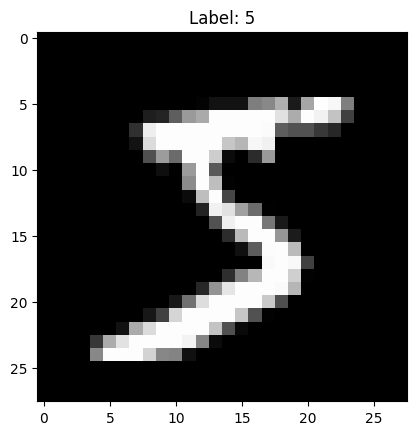

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the first image
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [ ]:
import numpy as np

# Normalize the images (0–255 → 0–1)
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Flatten (28×28 → 784)
X_train_flat = X_train_norm.reshape(len(X_train_norm), 784)
X_test_flat = X_test_norm.reshape(len(X_test_norm), 784)

print("Training shape:", X_train_flat.shape)
print("Testing shape:", X_test_flat.shape)


Training shape: (60000, 784)
Testing shape: (10000, 784)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_flat, y_train)

# Predict
y_pred_knn = knn.predict(X_test_flat)

# Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)


KNN Accuracy: 0.9705


In [ ]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_flat[:20000], y_train[:20000])  # using 20k samples for speed

# Predict
y_pred_svm = svm_model.predict(X_test_flat)

# Accuracy
from sklearn.metrics import accuracy_score
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)


SVM Accuracy: 0.9695


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Normalize for CNN (same as before)
X_train_cnn = X_train / 255.0
X_test_cnn = X_test / 255.0

# Reshape to (samples, 28, 28, 1)
X_train_cnn = X_train_cnn.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_cnn.reshape(-1, 28, 28, 1)

# One-hot encode labels (e.g., 5 → [0,0,0,0,0,1,0,0,0,0])
y_train_cnn = to_categorical(y_train, 10)
y_test_cnn = to_categorical(y_test, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    X_train_cnn, y_train_cnn,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.8476 - loss: 0.4786 - val_accuracy: 0.9842 - val_loss: 0.0519
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9778 - loss: 0.0707 - val_accuracy: 0.9830 - val_loss: 0.0583
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9828 - loss: 0.0555 - val_accuracy: 0.9883 - val_loss: 0.0396
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9876 - loss: 0.0377 - val_accuracy: 0.9895 - val_loss: 0.0323
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9901 - loss: 0.0330 - val_accuracy: 0.9918 - val_loss: 0.0299


In [ ]:
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_cnn)
print("CNN Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9890 - loss: 0.0309
CNN Test Accuracy: 0.9915000200271606


In [ ]:
import numpy as np

index = 9
img = X_test_cnn[index].reshape(1, 28, 28, 1)
prediction = model.predict(img)

print("Predicted Digit:", np.argmax(prediction))
print("Actual Digit:", y_test[index])

model.save("digit_cnn_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Predicted Digit: 9
Actual Digit: 9


In [ ]:
!pip install flask pyngrok pillow tensorflow

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("ngrok config add-authtoken 36TWYDTKQZ9tpUQXvwn72gFIs2u_4JXmMNUWDXfg6jBR6Zr1w")

In [ ]:
%%writefile app.py
from flask import Flask, render_template_string, request, jsonify
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import io
import base64

app = Flask(__name__)

# Load the model
model = load_model("digit_cnn_model.h5")

def preprocess_image(img):
    """Preprocess the drawn image to match MNIST format"""
    img = img.convert("L")
    img = ImageOps.invert(img)
    img = img.resize((28, 28))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array

HTML_PAGE = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Handwritten Digit Recognition</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css">
    <style>
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        }

        body {
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
            padding: 20px;
        }

        .container {
            max-width: 1200px;
            margin: 0 auto;
        }

        .header {
            text-align: center;
            color: white;
            margin-bottom: 30px;
            padding: 20px;
            background: rgba(255, 255, 255, 0.1);
            border-radius: 15px;
            backdrop-filter: blur(10px);
            box-shadow: 0 8px 32px rgba(0, 0, 0, 0.1);
        }

        .header h1 {
            font-size: 2.8rem;
            margin-bottom: 10px;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);
        }

        .header h2 {
            font-size: 1.4rem;
            font-weight: 300;
            margin-bottom: 20px;
        }

        .content {
            display: grid;
            grid-template-columns: 1fr 1fr;
            gap: 30px;
            margin-bottom: 30px;
        }

        @media (max-width: 900px) {
            .content {
                grid-template-columns: 1fr;
            }
        }

        .card {
            background: rgba(255, 255, 255, 0.95);
            border-radius: 15px;
            padding: 30px;
            box-shadow: 0 10px 30px rgba(0, 0, 0, 0.2);
            transition: transform 0.3s ease, box-shadow 0.3s ease;
        }

        .card:hover {
            transform: translateY(-5px);
            box-shadow: 0 15px 35px rgba(0, 0, 0, 0.25);
        }

        .card-title {
            color: #4a5568;
            font-size: 1.5rem;
            margin-bottom: 20px;
            padding-bottom: 10px;
            border-bottom: 2px solid #667eea;
            display: flex;
            align-items: center;
            gap: 10px;
        }

        .card-title i {
            color: #667eea;
        }

        .drawing-area {
            display: flex;
            flex-direction: column;
            align-items: center;
        }

        .canvas-container {
            position: relative;
            margin-bottom: 20px;
        }

        #canvas {
            border: 3px solid #4a5568;
            border-radius: 10px;
            background: white;
            cursor: crosshair;
            touch-action: none;
            box-shadow: 0 5px 15px rgba(0, 0, 0, 0.1);
        }

        .canvas-guide {
            position: absolute;
            top: 50%;
            left: 50%;
            transform: translate(-50%, -50%);
            color: rgba(0, 0, 0, 0.1);
            font-size: 120px;
            font-weight: bold;
            pointer-events: none;
            user-select: none;
            z-index: 1;
        }

        .buttons {
            display: flex;
            gap: 15px;
            margin-bottom: 20px;
        }

        .btn {
            padding: 12px 25px;
            border: none;
            border-radius: 8px;
            font-size: 16px;
            font-weight: 600;
            cursor: pointer;
            transition: all 0.3s ease;
            display: flex;
            align-items: center;
            gap: 8px;
        }

        .btn-primary {
            background: linear-gradient(to right, #667eea, #764ba2);
            color: white;
        }

        .btn-primary:hover {
            transform: scale(1.05);
            box-shadow: 0 5px 15px rgba(102, 126, 234, 0.4);
        }

        .btn-secondary {
            background: #e2e8f0;
            color: #4a5568;
        }

        .btn-secondary:hover {
            background: #cbd5e0;
            transform: scale(1.05);
        }

        .result-box {
            background: linear-gradient(to right, #f7fafc, #edf2f7);
            border-radius: 10px;
            padding: 20px;
            text-align: center;
            min-height: 120px;
            display: flex;
            flex-direction: column;
            justify-content: center;
            border: 2px dashed #cbd5e0;
        }

        .result-label {
            font-size: 18px;
            color: #718096;
            margin-bottom: 10px;
        }

        .result-value {
            font-size: 60px;
            font-weight: bold;
            color: #2d3748;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.1);
        }

        .info-list {
            list-style: none;
        }

        .info-list li {
            padding: 12px 0;
            border-bottom: 1px solid #e2e8f0;
            display: flex;
            align-items: center;
            gap: 10px;
        }

        .info-list li:last-child {
            border-bottom: none;
        }

        .info-list i {
            color: #667eea;
            width: 24px;
        }

        .group-info {
            margin-top: 20px;
            background: rgba(102, 126, 234, 0.1);
            padding: 20px;
            border-radius: 10px;
        }

        .group-info h3 {
            color: #4a5568;
            margin-bottom: 15px;
            display: flex;
            align-items: center;
            gap: 10px;
        }

        .student {
            display: flex;
            justify-content: space-between;
            padding: 8px 0;
            border-bottom: 1px dashed #cbd5e0;
        }

        .student:last-child {
            border-bottom: none;
        }

        .university {
            margin-top: 15px;
            font-style: italic;
            color: #718096;
            text-align: center;
        }

        .note {
            background: #fff5f5;
            border-left: 4px solid #fc8181;
            padding: 15px;
            margin-top: 20px;
            border-radius: 0 8px 8px 0;
        }

        .note h4 {
            color: #c53030;
            margin-bottom: 5px;
            display: flex;
            align-items: center;
            gap: 8px;
        }

        .footer {
            text-align: center;
            color: white;
            margin-top: 30px;
            padding: 20px;
            font-size: 0.9rem;
            opacity: 0.8;
        }

        .accuracy-badge {
            display: inline-block;
            background: linear-gradient(to right, #48bb78, #38a169);
            color: white;
            padding: 5px 15px;
            border-radius: 20px;
            font-size: 0.9rem;
            margin-left: 10px;
        }
    </style>
</head>
<body>
    <div class="container">
        <header class="header">
            <h1><i class="fas fa-brain"></i> Handwritten Digit Recognition</h1>
            <h2>Deep Learning Model for Recognizing Handwritten Digits (0-9)</h2>
            <div style="margin-top: 10px;">
                <span class="accuracy-badge">CNN Accuracy: 99%+</span>
            </div>
        </header>

        <div class="content">
            <div class="card drawing-area">
                <h2 class="card-title"><i class="fas fa-paint-brush"></i> Draw Your Digit</h2>

                <div class="canvas-container">
                    <div class="canvas-guide">8</div>
                    <canvas id="canvas" width="280" height="280"></canvas>
                </div>

                <p style="color: #718096; margin-bottom: 20px; text-align: center;">
                    <i class="fas fa-lightbulb"></i> Tip: Draw a single digit (0-9) in the center of the box
                </p>

                <div class="buttons">
                    <button class="btn btn-secondary" onclick="clearCanvas()">
                        <i class="fas fa-eraser"></i> Clear Canvas
                    </button>
                    <button class="btn btn-primary" onclick="predictDigit()">
                        <i class="fas fa-robot"></i> Predict Digit
                    </button>
                </div>

                <div class="result-box">
                    <div class="result-label">Predicted Digit:</div>
                    <div id="result" class="result-value">-</div>
                </div>
            </div>

            <div class="card">
                <h2 class="card-title"><i class="fas fa-info-circle"></i> Project Information</h2>

                <ul class="info-list">
                    <li>
                        <i class="fas fa-project-diagram"></i>
                        <div>
                            <strong>Project Title:</strong> Handwritten Digit Recognition System
                        </div>
                    </li>
                    <li>
                        <i class="fas fa-cogs"></i>
                        <div>
                            <strong>Algorithms Used:</strong>
                            <div style="margin-top: 5px;">
                                <span class="accuracy-badge" style="background: linear-gradient(to right, #4299e1, #3182ce);">KNN</span>
                                <span class="accuracy-badge" style="background: linear-gradient(to right, #ed8936, #dd6b20);">SVM</span>
                                <span class="accuracy-badge" style="background: linear-gradient(to right, #48bb78, #38a169);">CNN</span>
                            </div>
                        </div>
                    </li>
                    <li>
                        <i class="fas fa-database"></i>
                        <div>
                            <strong>Dataset:</strong> MNIST (70,000 handwritten digits)
                        </div>
                    </li>
                    <li>
                        <i class="fas fa-layer-group"></i>
                        <div>
                            <strong>CNN Architecture:</strong> 2 Conv layers, 2 Pooling layers, 128-neuron Dense layer
                        </div>
                    </li>
                    <li>
                        <i class="fas fa-bullseye"></i>
                        <div>
                            <strong>Best Accuracy:</strong> CNN achieves 99%+ on test data
                        </div>
                    </li>
                </ul>

                <div class="group-info">
                    <h3><i class="fas fa-users"></i> Group Members</h3>
                    <div class="student">
                        <span><strong>Choyon Dhor</strong></span>
                        <span>ID: 231-115-094</span>
                    </div>
                    <div class="student">
                        <span><strong>Puspo Gondha Paul</strong></span>
                        <span>ID: 231-115-082</span>
                    </div>
                    <div class="university">
                        CSE 58th Batch, Section C<br>
                        Metropolitan University, Sylhet
                    </div>
                </div>

                <div class="note">
                    <h4><i class="fas fa-exclamation-triangle"></i> Limitations & Instructions</h4>
                    <p>1. Draw digits in the <strong>center</strong> of the canvas for best results</p>
                    <p>2. Make digits <strong>clear and complete</strong> (not too small or partial)</p>
                    <p>3. The model works best with <strong>single digits</strong> (0-9)</p>
                    <p>4. Draw with <strong>consistent thickness</strong> (use the entire canvas)</p>
                    <p>5. Clear canvas before drawing a new digit</p>
                </div>
            </div>
        </div>

        <footer class="footer">
            <p>© 2024 Handwritten Digit Recognition Project | Metropolitan University, Sylhet</p>
            <p>Deep Learning & Computer Vision Application | CSE 58th Batch</p>
        </footer>
    </div>

    <script>
        // Canvas setup
        const canvas = document.getElementById('canvas');
        const ctx = canvas.getContext('2d');
        const guide = document.querySelector('.canvas-guide');

        // Set initial canvas background
        ctx.fillStyle = 'white';
        ctx.fillRect(0, 0, canvas.width, canvas.height);

        // Drawing settings
        ctx.lineWidth = 15;
        ctx.lineCap = 'round';
        ctx.lineJoin = 'round';
        ctx.strokeStyle = 'black';

        // Variables for drawing
        let drawing = false;
        let lastX = 0;
        let lastY = 0;

        // Hide guide when drawing starts
        canvas.addEventListener('mousedown', (e) => {
            drawing = true;
            guide.style.opacity = '0';
            const rect = canvas.getBoundingClientRect();
            lastX = e.clientX - rect.left;
            lastY = e.clientY - rect.top;

            // Start new path
            ctx.beginPath();
            ctx.moveTo(lastX, lastY);
        });

        canvas.addEventListener('mousemove', (e) => {
            if (!drawing) return;

            const rect = canvas.getBoundingClientRect();
            const x = e.clientX - rect.left;
            const y = e.clientY - rect.top;

            // Draw line
            ctx.lineTo(x, y);
            ctx.stroke();

            lastX = x;
            lastY = y;
        });

        canvas.addEventListener('mouseup', () => {
            drawing = false;
            ctx.beginPath(); // Start new path for next stroke
        });

        canvas.addEventListener('mouseleave', () => {
            drawing = false;
            ctx.beginPath();
        });

        // Touch support for mobile devices
        canvas.addEventListener('touchstart', (e) => {
            e.preventDefault();
            drawing = true;
            guide.style.opacity = '0';
            const touch = e.touches[0];
            const rect = canvas.getBoundingClientRect();
            lastX = touch.clientX - rect.left;
            lastY = touch.clientY - rect.top;

            ctx.beginPath();
            ctx.moveTo(lastX, lastY);
        });

        canvas.addEventListener('touchmove', (e) => {
            e.preventDefault();
            if (!drawing) return;

            const touch = e.touches[0];
            const rect = canvas.getBoundingClientRect();
            const x = touch.clientX - rect.left;
            const y = touch.clientY - rect.top;

            ctx.lineTo(x, y);
            ctx.stroke();

            lastX = x;
            lastY = y;
        });

        canvas.addEventListener('touchend', () => {
            drawing = false;
            ctx.beginPath();
        });

        function clearCanvas() {
            // Clear canvas
            ctx.fillStyle = 'white';
            ctx.fillRect(0, 0, canvas.width, canvas.height);

            // Reset guide
            guide.style.opacity = '1';

            // Clear result
            document.getElementById('result').textContent = '-';
            document.getElementById('result').style.color = '#2d3748';
        }

        async function predictDigit() {
            // Show loading state
            const resultElement = document.getElementById('result');
            resultElement.textContent = '...';
            resultElement.style.color = '#667eea';

            // Get canvas data as image
            const dataURL = canvas.toDataURL('image/png');

            try {
                const response = await fetch('/predict', {
                    method: 'POST',
                    headers: {
                        'Content-Type': 'application/json',
                    },
                    body: JSON.stringify({ image: dataURL })
                });

                if (!response.ok) {
                    throw new Error('Network response was not ok');
                }

                const data = await response.json();

                // Display result with animation
                resultElement.textContent = data.prediction;
                resultElement.style.color = '#48bb78';

                // Add subtle animation
                resultElement.style.transform = 'scale(1.1)';
                setTimeout(() => {
                    resultElement.style.transform = 'scale(1)';
                }, 300);

            } catch (error) {
                console.error('Error:', error);
                resultElement.textContent = 'Error';
                resultElement.style.color = '#fc8181';
            }
        }

        // Add keyboard shortcuts
        document.addEventListener('keydown', (e) => {
            // Space to clear
            if (e.code === 'Space') {
                clearCanvas();
                e.preventDefault();
            }
            // Enter to predict
            if (e.code === 'Enter') {
                predictDigit();
                e.preventDefault();
            }
            // Escape to clear
            if (e.code === 'Escape') {
                clearCanvas();
                e.preventDefault();
            }
        });

        // Instructions tooltip
        console.log("Drawing Tips:");
        console.log("1. Draw digits in the center of the canvas");
        console.log("2. Make digits large and clear");
        console.log("3. Use SPACE to clear, ENTER to predict");
    </script>
</body>
</html>
"""

@app.route('/')
def index():
    return render_template_string(HTML_PAGE)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        image_data = data['image'].split(',')[1]

        # Decode base64 image
        img_bytes = base64.b64decode(image_data)
        img = Image.open(io.BytesIO(img_bytes))

        # Preprocess image
        processed_img = preprocess_image(img)

        # Make prediction
        prediction = model.predict(processed_img)
        digit = np.argmax(prediction[0])

        return jsonify({'prediction': int(digit)})

    except Exception as e:
        print(f"Error: {e}")
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=False)

In [ ]:
!pip install flask pyngrok pillow tensorflow -q

from pyngrok import ngrok, conf

# Get your new v2 authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
# Replace with your actual token
NGROK_AUTH_TOKEN = "36TWYDTKQZ9tpUQXvwn72gFIs2u_4JXmMNUWDXfg6jBR6Zr1w"  # Example - use your real token

# Set the auth token
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

get_ipython().system_raw("python app.py &")

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print(f"Public URL: {public_url}")